In [151]:
# passo 1 - importar e visualizar o dataset
import pandas as pd

tabela = pd.read_csv('house_price_regression_dataset.csv')
display(tabela.head(4))
display(tabela.info())
display(tabela.nunique())
tabela.describe()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.852274
1,4272,3,3,2016,4.753014,1,6,985260.854490
2,3592,1,2,2016,3.634823,0,9,777977.390119
3,966,1,2,1977,2.730667,1,8,229698.918664


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


None

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [152]:
# passo 2 - explorar os dados
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.histogram(tabela, 'Year_Built', 'House_Price')
fig.show()

fig_garage = px.histogram(tabela, 'Garage_Size', 'House_Price', width=600)
fig_garage.show()

agrupado_bed = tabela.groupby('Num_Bedrooms')['House_Price'].mean()
display(agrupado_bed)

agrupado_bath = tabela.groupby('Num_Bathrooms')['House_Price'].mean()
display(agrupado_bath)


Num_Bedrooms
1    610105.127042
2    601324.699465
3    653491.479508
4    621162.807785
5    612880.757669
Name: House_Price, dtype: float64

Num_Bathrooms
1    616475.010928
2    625152.005929
3    615077.581682
Name: House_Price, dtype: float64

In [153]:
# passo 3 - limpar e preparar os dados
tabela = tabela.drop(columns='Lot_Size')
tabela.nunique()
tabela.to_csv('preparado_house_price_regression_dataset.csv')

In [154]:
# passo 4 - separar os dados de teste e treino e treinar o modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

X = tabela.drop(columns='House_Price')
y = tabela['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [155]:
# KNN

modelo_KNN = KNeighborsRegressor()

modelo_KNN.fit(X, y)

pred_KNN = modelo_KNN.predict(X_test)

In [156]:
# random forest

modelo_random = RandomForestRegressor()

modelo_random.fit(X, y)

pred_random = modelo_random.predict(X_test)

In [157]:
# metricas do KNN
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

MAE_KNN = mean_absolute_error(y_test, y_pred=pred_KNN)
RMSE_KNN = np.sqrt(mean_squared_error(y_test, y_pred=pred_KNN))
R2_KNN = r2_score(y_test, y_pred=pred_KNN)

print(f'Erro absoluto médio: {MAE_KNN:.2f}')
print(f'Raiz do erro quadratico médio: {RMSE_KNN:.2f}')
print(f'Coeficiente de Determinação: {R2_KNN:.2f}')

Erro absoluto médio: 20477.20
Raiz do erro quadratico médio: 25665.37
Coeficiente de Determinação: 0.99


In [158]:
# metricas do random forest

MAE_random = mean_absolute_error(y_test, y_pred=pred_random)
RMSE_random = np.sqrt(mean_squared_error(y_test, y_pred=pred_random))
R2_random = r2_score(y_test, y_pred=pred_random)

print(f'Erro absoluto médio: {MAE_random:.2f}')
print(f'Raiz do erro quadratico médio: {RMSE_random:.2f}')
print(f'Coeficiente de Determinação: {R2_random:.2f}')

Erro absoluto médio: 8037.43
Raiz do erro quadratico médio: 9968.58
Coeficiente de Determinação: 1.00


In [161]:
# cross validation KNN
from sklearn.model_selection import cross_val_score

cross_KNN = cross_val_score(modelo_KNN, X, y, cv=5)
print(f'Validação cruzada de KNN: {cross_KNN}')

Validação cruzada de KNN: [0.9824477  0.98360341 0.98610042 0.98428347 0.98313335]


In [166]:
# cross validation de random forest

cross_random = cross_val_score(modelo_random, X, y, cv=5)
print(f'Validação cruzada de Random Forest: {cross_random}')

Validação cruzada de Random Forest: [0.98864172 0.98701169 0.99039208 0.98831845 0.9867648 ]


In [ ]:
# Escolha do modelo

# Primeiras analises
# KNN:
# Erro absoluto médio: 190532.39
# Raiz do erro quadratico médio: 227520.19
# Coeficiente de Determinação: 0.20

# Random Forest:
# Erro absoluto médio: 86330.17
# Raiz do erro quadratico médio: 106310.49
# Coeficiente de Determinação: 0.82

# Apos modificacoes
# KNN: 
# Erro absoluto médio: 21025.07
# Raiz do erro quadratico médio: 25756.15
# Coeficiente de Determinação: 0.99

# Random Forest:
# Erro absoluto médio: 8057.07
# Raiz do erro quadratico médio: 10053.57
# Coeficiente de Determinação: 1.00

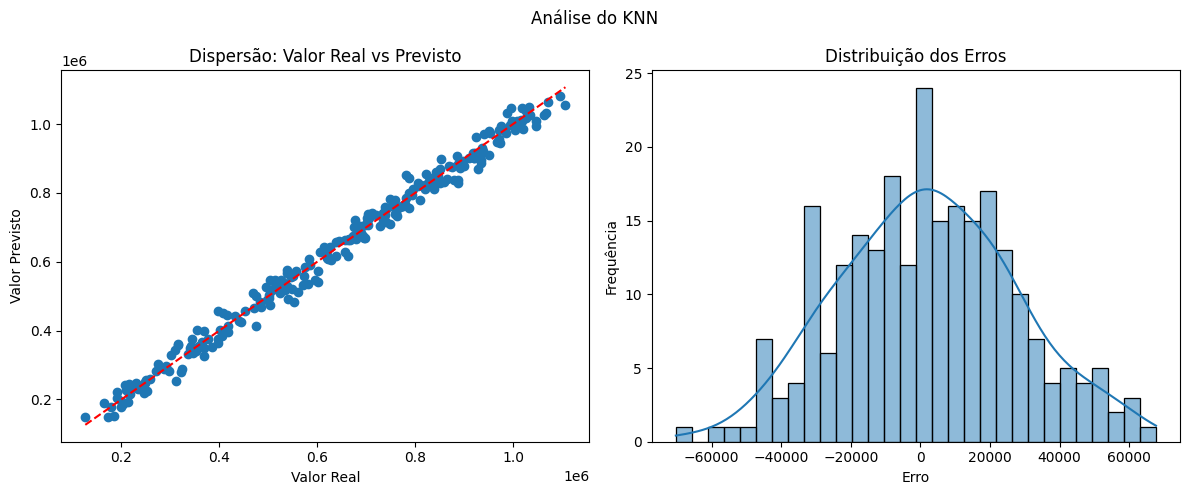

In [188]:
# visualizacoes no KNN
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.suptitle("Análise do KNN")

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_KNN) # cria grafico de dispersao entre os valores reais e previsto
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Dispersão: Valor Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plota uma linha tracejada representando a linha ideal onde o valor real = valor previsto

plt.subplot(1, 2, 2)
erros = y_test - pred_KNN # calcula os erros (residuos) subtraindo os valores prvistos dos reais
sns.histplot(erros, bins=30, kde=True) # histograma com densidade(kde = True) para visualizar as distribuição dos erros
plt.title("Distribuição dos Erros")
plt.xlabel('Erro')
plt.ylabel('Frequência')

plt.savefig("images/AnaliseKNN.png", dpi=300, bbox_inches='tight')
# dpi=300 -> define a resolucao da imagem
# bbox_inches='tight' -> remove espacos em branco desnecessarios ao redor da imagem

plt.tight_layout()
plt.show()

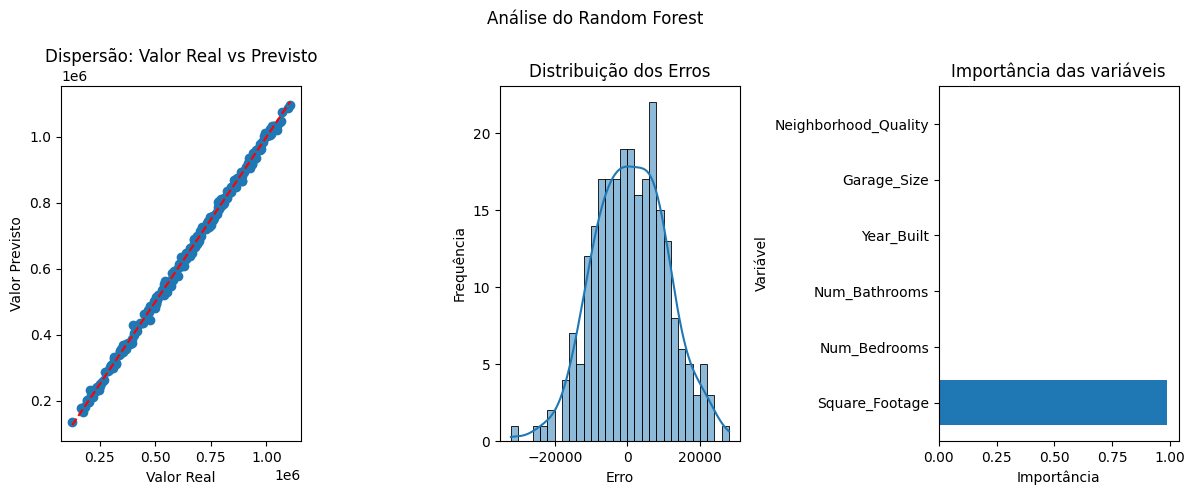

In [189]:
# visualizacoes Random forest

plt.figure(figsize=(12,5))
plt.suptitle('Análise do Random Forest')

plt.subplot(1,3,1)
plt.scatter(y_test, pred_random)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Dispersão: Valor Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1,3,2)
erros_random = y_test - pred_random
sns.histplot(erros_random, bins=30, kde=True)
# bins = 30 -> é usado em histogramas para para controlar o número de divisões do eixo X
plt.title("Distribuição dos Erros")
plt.xlabel('Erro')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
importances = modelo_random.feature_importances_ # obtem a importancia de cada variavel
plt.barh(X.columns, importances)
# X.columns -> é usado quando tens um dataframe X e queres acessar os nomes das colunas
plt.title("Importância das variáveis")
plt.xlabel("Importância")
plt.ylabel('Variável')

plt.savefig("images/AnaliseRandomForest.png", dpi=300, bbox_inches='tight')
# dpi=300 -> define a resolucao da imagem
# bbox_inches='tight' -> remove espacos em branco desnecessarios ao redor da imagem

plt.tight_layout()
plt.show()
